# Text Classification Project


## Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/Drive")

base_path = "/content/Drive/MyDrive/NLP-Course/03-Text-Classification/"

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


## Perform imports and load the dataset
The dataset contains the text of 2000 movie reviews. 1000 are positive, 1000 are negative, and the text has been preprocessed as a tab-delimited file.

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(base_path + 'moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
df.shape

(2000, 2)

### Take a look at a typical review. This one is labeled "negative":

In [4]:
from IPython.display import Markdown, display
display(Markdown('> '+df['review'][0])) # This is the first review labeled as negative

> how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates between unfunny scenes of the brothers bickering over what to do with their inheritance and endless action sequences as the two take on their increasingly determined furry foe . 
whatever promise the film starts with soon deteriorates into boring dialogue , terrible overacting , and increasingly uninspired slapstick that becomes all sound and fury , signifying nothing . 
the script becomes so unspeakably bad that the best line poor lee evens can utter after another run in with the rodent is : " i hate that mouse " . 
oh cringe ! 
this is home alone all over again , and ten times worse . 
one touching scene early on is worth mentioning . 
we follow the mouse through a maze of walls and pipes until he arrives at his makeshift abode somewhere in a wall . 
he jumps into a tiny bed , pulls up a makeshift sheet and snuggles up to sleep , seemingly happy and just wanting to be left alone . 
it's a magical little moment in an otherwise soulless film . 
a message to speilberg : if you want dreamworks to be associated with some kind of artistic credibility , then either give all concerned in mouse hunt a swift kick up the arse or hire yourself some decent writers and directors . 
this kind of rubbish will just not do at all . 


## Check for missing values:


In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
# Dropping / Deleting all records with null values in them
df.dropna(inplace=True)
# Reseting the index and dropping the old index
df.reset_index(inplace=True, drop=True)
df.isnull().sum()

label     0
review    0
dtype: int64

### Detect & remove empty strings


In [7]:
blanks = []

for index, label, review in df.itertuples():
    if type(review) == str:
        if review.isspace():
            blanks.append(index)

print(len(blanks), "blanks :", blanks)

27 blanks : [57, 71, 146, 150, 280, 304, 310, 320, 339, 347, 423, 496, 626, 668, 803, 838, 963, 1063, 1278, 1430, 1466, 1498, 1504, 1730, 1818, 1871, 1958]


In [8]:
df.drop(blanks, inplace=True)
df.shape

(1938, 2)

## Take a quick look at the `label` column:

In [9]:
df["label"].value_counts()

pos    969
neg    969
Name: label, dtype: int64

## Split the data into train & test sets:

In [10]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape

((1550,), (388,))

## Build pipelines to vectorize the data, then train and fit a model
Now that we have sets to train and test, we'll develop a selection of pipelines, each with a different model.

In [12]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

set_config(print_changed_only=False)

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                        ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                          ('clf', LinearSVC()),
])

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

def classification_metrics(y_test, y_pred):
    # Calculating the Accuracy Score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy Score :", accuracy, "\n\n")

    # Classification Report
    print("Classification Report :\n")
    print(metrics.classification_report(y_test, y_pred), "\n\n")

    # Confusion Matrix
    conf_matx = metrics.confusion_matrix(y_test, y_pred)
    conf_matx_df = pd.DataFrame(conf_matx, index=["True neg", "True pos"], columns=["Predicted neg", "Predicted pos"])
    ## Using Heatmap plot to show the Confusion Matrix
    plt.figure(dpi=80)
    sns.heatmap(conf_matx_df, annot=True, fmt='.0f')
    plt.title("Confuion Matrix - Heatmap", fontdict={"fontsize": 12, "fontweight":"bold"})
    plt.show()

### Training and Testing Naive Bayes Model

In [14]:
text_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Accuracy Score : 0.7963917525773195 


Classification Report :

              precision    recall  f1-score   support

         neg       0.73      0.93      0.81       188
         pos       0.91      0.68      0.77       200

    accuracy                           0.80       388
   macro avg       0.82      0.80      0.79       388
weighted avg       0.82      0.80      0.79       388
 




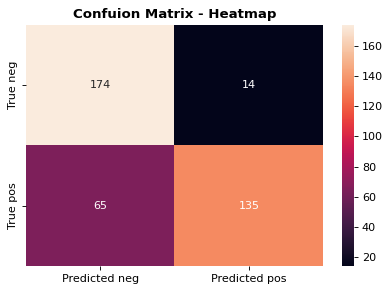

In [15]:
predictions = text_clf_nb.predict(X_test)

classification_metrics(y_test, predictions)

### Training and Testing Linear SVC Model

In [16]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

Accuracy Score : 0.865979381443299 


Classification Report :

              precision    recall  f1-score   support

         neg       0.86      0.86      0.86       188
         pos       0.87      0.87      0.87       200

    accuracy                           0.87       388
   macro avg       0.87      0.87      0.87       388
weighted avg       0.87      0.87      0.87       388
 




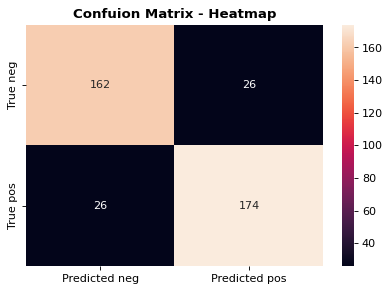

In [17]:
predictions = text_clf_lsvc.predict(X_test)

classification_metrics(y_test, predictions)

We Got 80% Accuracy using the Naive Bayes Model and 86.5% Accuracy using the Linear SVC Model which is pretty good.

## Advanced Topic - Adding Stopwords to CountVectorizer

In [18]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

In [19]:
import numpy as np
import pandas as pd

df = pd.read_csv(base_path + 'moviereviews.tsv', sep='\t')

df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

blanks = []
for index, label, review in df.itertuples():
    if type(review) == str:
        if review.isspace():
            blanks.append(index)
print(len(blanks), "blanks :", blanks)

from sklearn.model_selection import train_test_split
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

27 blanks : [57, 71, 146, 150, 280, 304, 310, 320, 339, 347, 423, 496, 626, 668, 803, 838, 963, 1063, 1278, 1430, 1466, 1498, 1504, 1730, 1818, 1871, 1958]


In [20]:
set_config(print_changed_only=False)

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                        ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                          ('clf', LinearSVC()),
])

Accuracy Score : 0.8015267175572519 


Classification Report :

              precision    recall  f1-score   support

         neg       0.78      0.85      0.82       202
         pos       0.83      0.75      0.79       191

    accuracy                           0.80       393
   macro avg       0.80      0.80      0.80       393
weighted avg       0.80      0.80      0.80       393
 




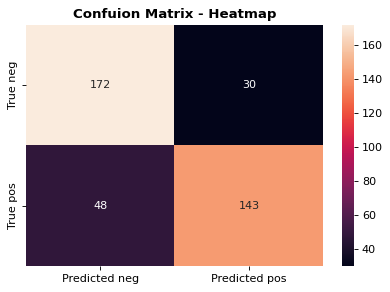

In [21]:
text_clf_nb.fit(X_train, y_train)

predictions = text_clf_nb.predict(X_test)

classification_metrics(y_test, predictions)

Accuracy Score : 0.8396946564885496 


Classification Report :

              precision    recall  f1-score   support

         neg       0.83      0.87      0.85       202
         pos       0.85      0.81      0.83       191

    accuracy                           0.84       393
   macro avg       0.84      0.84      0.84       393
weighted avg       0.84      0.84      0.84       393
 




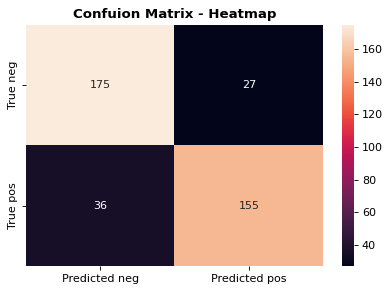

In [22]:
text_clf_lsvc.fit(X_train, y_train)

predictions = text_clf_lsvc.predict(X_test)

classification_metrics(y_test, predictions)

In this case our dataset is very small with only 2000 reviews. The effect of removing the stop words is observed in larger datasets.

## Testing the Linear SVC Model Pipeline over some custom review

In [23]:
myreview = "I didn't liked the movie at all. The dialogues were very bad most\
            of the sences between the actors seemed funny and not serious."

print(text_clf_lsvc.predict([myreview]))

['neg']


In [24]:
myreview = "I loved the movie a lot. The action scenes we amazing."

print(text_clf_lsvc.predict([myreview]))

['pos']
